In [1]:
import xarray as xr
import geopandas as gpd
from shapely.geometry import Polygon

In [2]:
# parameters
year = 0

In [3]:
target_structure_df = gpd.read_file("hex_features.geojson")
target_structure_df

,id,lon,lat,depth,disease,rest,substrate,connectivity,geometry
0,0,-16.329105,46.374396,713,0,1,B,"{ ""12"": 0.45346748794366032, ""37"": 0.012913065...","POLYGON ((-14.51711 46.60238, -15.16223 45.407..."
1,1,-16.934889,48.532510,386,1,1,B,"{ ""43"": 0.1609716073250777, ""42"": 0.1507863617...","POLYGON ((-15.04778 48.77164, -15.7016 47.5752..."
2,2,-17.609968,50.682301,660,1,0,A,"{ ""43"": 0.017293166777827714, ""50"": 0.00376070...","POLYGON ((-15.63984 50.9339, -16.30159 49.7352..."
3,3,-13.378738,45.614808,13,1,1,C,"{ ""45"": 0.050989515449425947, ""55"": 0.03585010...","POLYGON ((-11.58371 45.79082, -12.28392 44.613..."
4,4,-13.845476,47.792431,175,1,0,C,"{ ""46"": 0.045992713382386224, ""37"": 0.00974576...","POLYGON ((-11.97583 47.97692, -12.69172 46.798..."
...,...,...,...,...,...,...,...,...,...
61,61,7.647046,55.683753,437,0,0,B,"{ ""40"": 0.0023490878368109609, ""58"": 0.0185493...","POLYGON ((9.86175 55.4803, 8.45421 54.50344, 6..."
62,62,8.252435,57.853770,280,0,1,C,"{ ""19"": 0.029002563024507117, ""22"": 0.07541890...","POLYGON ((10.59258 57.63694, 9.08025 56.66938,..."
63,63,8.948081,60.020024,772,1,0,C,"{ ""46"": 0.15081197469337265, ""35"": 0.141450243...","POLYGON ((11.43088 59.78781, 9.79599 58.83068,..."
64,64,10.601600,54.286838,537,0,0,B,"{ ""42"": 0.012655647832855978, ""37"": 0.50501270...","POLYGON ((12.72622 54.0323, 11.30391 53.08923,..."


In [4]:
target_structure_df.iloc[0]["connectivity"]

'{ "12": 0.45346748794366032, "37": 0.012913065799323206, "38": 0.086404514517775657, "58": 0.15217429652585379, "50": 0.29504063521338708 }'

In [5]:
connectivity_ds = xr.open_dataset("2023-02-22_connectivity_matrix_hexes_with_biodata.nc").isel(year=year, drop=True)
connectivity_ds

<xarray.Dataset> Size: 561MB
Dimensions:           (hex0: 8295, hex1: 8365, corner: 7)
Coordinates:
  * hex0              (hex0) <U47 2MB '(-1, -19, 20)' ... '(9, 9, -18)'
  * hex1              (hex1) <U47 2MB '(-1, -19, 20)' ... '(9, 9, -18)'
    lon_hex0_corners  (corner, hex0) float64 465kB ...
    lat_hex0_corners  (corner, hex0) float64 465kB ...
    lon_hex1_corners  (corner, hex1) float64 468kB ...
    lat_hex1_corners  (corner, hex1) float64 468kB ...
    lon_hex0          (hex0) float64 66kB ...
    lon_hex1          (hex1) float64 67kB ...
    lat_hex0          (hex0) float64 66kB ...
    lat_hex1          (hex1) float64 67kB ...
Dimensions without coordinates: corner
Data variables:
    aqc_count_hex0    (hex0) float64 66kB ...
    rst_count_hex0    (hex0) float64 66kB ...
    pop_count_hex0    (hex0) float64 66kB ...
    dss_count_hex0    (hex0) float64 66kB ...
    aqc_count_hex1    (hex1) float64 67kB ...
    rst_count_hex1    (hex1) float64 67kB ...
    pop_count_hex1    (hex1) float64 67kB ...
    dss_count_hex1    (hex1) float64 67kB ...
    obs               (hex0, hex1) float64 555MB ...

In [35]:
all_hexes = sorted(set(connectivity_ds.hex0.data).union(set(connectivity_ds.hex1.data)))
all_hexes = [h for h in all_hexes if '-9223372036854775808' not in h]
hexes_id_mapping = {n: str(h) for n, h in enumerate(all_hexes)}
hexes_id_mapping_inv = {v: k for k, v in hexes_id_mapping.items()}

In [36]:
hexes_id_mapping

{0: '(-1, -19, 20)',
 1: '(-1, -2, 3)',
 2: '(-1, -20, 21)',
 3: '(-1, -21, 22)',
 4: '(-1, -24, 25)',
 5: '(-1, -25, 26)',
 6: '(-1, -26, 27)',
 7: '(-1, -27, 28)',
 8: '(-1, -28, 29)',
 9: '(-1, -29, 30)',
 10: '(-1, -3, 4)',
 11: '(-1, -30, 31)',
 12: '(-1, -31, 32)',
 13: '(-1, -32, 33)',
 14: '(-1, -33, 34)',
 15: '(-1, -34, 35)',
 16: '(-1, -35, 36)',
 17: '(-1, -36, 37)',
 18: '(-1, -4, 5)',
 19: '(-1, -44, 45)',
 20: '(-1, -45, 46)',
 21: '(-1, -46, 47)',
 22: '(-1, -47, 48)',
 23: '(-1, -48, 49)',
 24: '(-1, -49, 50)',
 25: '(-1, -5, 6)',
 26: '(-1, -50, 51)',
 27: '(-1, -51, 52)',
 28: '(-1, -52, 53)',
 29: '(-1, -53, 54)',
 30: '(-1, -54, 55)',
 31: '(-1, -6, 7)',
 32: '(-1, -7, 8)',
 33: '(-1, 10, -9)',
 34: '(-1, 21, -20)',
 35: '(-1, 22, -21)',
 36: '(-1, 23, -22)',
 37: '(-1, 24, -23)',
 38: '(-1, 25, -24)',
 39: '(-1, 27, -26)',
 40: '(-1, 28, -27)',
 41: '(-1, 29, -28)',
 42: '(-1, 30, -29)',
 43: '(-1, 31, -30)',
 44: '(-1, 32, -31)',
 45: '(-1, 33, -32)',
 46: '(-1, 

In [37]:
hexes_id_mapping_inv

{'(-1, -19, 20)': 0,
 '(-1, -2, 3)': 1,
 '(-1, -20, 21)': 2,
 '(-1, -21, 22)': 3,
 '(-1, -24, 25)': 4,
 '(-1, -25, 26)': 5,
 '(-1, -26, 27)': 6,
 '(-1, -27, 28)': 7,
 '(-1, -28, 29)': 8,
 '(-1, -29, 30)': 9,
 '(-1, -3, 4)': 10,
 '(-1, -30, 31)': 11,
 '(-1, -31, 32)': 12,
 '(-1, -32, 33)': 13,
 '(-1, -33, 34)': 14,
 '(-1, -34, 35)': 15,
 '(-1, -35, 36)': 16,
 '(-1, -36, 37)': 17,
 '(-1, -4, 5)': 18,
 '(-1, -44, 45)': 19,
 '(-1, -45, 46)': 20,
 '(-1, -46, 47)': 21,
 '(-1, -47, 48)': 22,
 '(-1, -48, 49)': 23,
 '(-1, -49, 50)': 24,
 '(-1, -5, 6)': 25,
 '(-1, -50, 51)': 26,
 '(-1, -51, 52)': 27,
 '(-1, -52, 53)': 28,
 '(-1, -53, 54)': 29,
 '(-1, -54, 55)': 30,
 '(-1, -6, 7)': 31,
 '(-1, -7, 8)': 32,
 '(-1, 10, -9)': 33,
 '(-1, 21, -20)': 34,
 '(-1, 22, -21)': 35,
 '(-1, 23, -22)': 36,
 '(-1, 24, -23)': 37,
 '(-1, 25, -24)': 38,
 '(-1, 27, -26)': 39,
 '(-1, 28, -27)': 40,
 '(-1, 29, -28)': 41,
 '(-1, 30, -29)': 42,
 '(-1, 31, -30)': 43,
 '(-1, 32, -31)': 44,
 '(-1, 33, -32)': 45,
 '(-1, 34, 

In [8]:
hex_polys = {
    str(hexid): Polygon(
        list(zip(
            connectivity_ds.lon_hex0_corners.sel(hex0=hexid).isel(corner=slice(None, 6)).data,
            connectivity_ds.lat_hex0_corners.sel(hex0=hexid).isel(corner=slice(None, 6)).data,
        ))
    )
    for hexid in connectivity_ds.hex0.data
    if ~connectivity_ds.lon_hex0_corners.sel(hex0=hexid).isel(corner=0).isnull()
}
hex_polys.update(
    {
        str(hexid): Polygon(
            list(zip(
                connectivity_ds.lon_hex1_corners.sel(hex1=hexid).isel(corner=slice(None, 6)).data,
                connectivity_ds.lat_hex1_corners.sel(hex1=hexid).isel(corner=slice(None, 6)).data,
            ))
        )
        for hexid in connectivity_ds.hex1.data
        if ~connectivity_ds.lon_hex1_corners.sel(hex1=hexid).isel(corner=0).isnull()
    }
)

In [18]:
aqc_count = {
    str(hexid): connectivity_ds.aqc_count_hex0.sel(hex0=hexid).data
    for hexid in connectivity_ds.hex0.data
    if ~connectivity_ds.lon_hex0_corners.sel(hex0=hexid).isel(corner=0).isnull()
}
aqc_count.update({
    str(hexid): connectivity_ds.aqc_count_hex1.sel(hex1=hexid).data
    for hexid in connectivity_ds.hex1.data
    if ~connectivity_ds.lon_hex1_corners.sel(hex1=hexid).isel(corner=0).isnull()
})

In [19]:
rst_count = {
    str(hexid): connectivity_ds.rst_count_hex0.sel(hex0=hexid).data
    for hexid in connectivity_ds.hex0.data
    if ~connectivity_ds.lon_hex0_corners.sel(hex0=hexid).isel(corner=0).isnull()
}
rst_count.update({
    str(hexid): connectivity_ds.rst_count_hex1.sel(hex1=hexid).data
    for hexid in connectivity_ds.hex1.data
    if ~connectivity_ds.lon_hex1_corners.sel(hex1=hexid).isel(corner=0).isnull()
})

In [20]:
dss_count = {
    str(hexid): connectivity_ds.dss_count_hex0.sel(hex0=hexid).data
    for hexid in connectivity_ds.hex0.data
    if ~connectivity_ds.lon_hex0_corners.sel(hex0=hexid).isel(corner=0).isnull()
}
dss_count.update({
    str(hexid): connectivity_ds.dss_count_hex1.sel(hex1=hexid).data
    for hexid in connectivity_ds.hex1.data
    if ~connectivity_ds.lon_hex1_corners.sel(hex1=hexid).isel(corner=0).isnull()
})

In [21]:
pop_count = {
    str(hexid): connectivity_ds.pop_count_hex0.sel(hex0=hexid).data
    for hexid in connectivity_ds.hex0.data
    if ~connectivity_ds.lon_hex0_corners.sel(hex0=hexid).isel(corner=0).isnull()
}
pop_count.update({
    str(hexid): connectivity_ds.pop_count_hex1.sel(hex1=hexid).data
    for hexid in connectivity_ds.hex1.data
    if ~connectivity_ds.lon_hex1_corners.sel(hex1=hexid).isel(corner=0).isnull()
})

In [13]:
depth = {k: -999 for k in aqc_count.keys()}
depth

{'(-1, -2, 3)': -999,
 '(-1, -20, 21)': -999,
 '(-1, -21, 22)': -999,
 '(-1, -24, 25)': -999,
 '(-1, -25, 26)': -999,
 '(-1, -26, 27)': -999,
 '(-1, -27, 28)': -999,
 '(-1, -28, 29)': -999,
 '(-1, -29, 30)': -999,
 '(-1, -3, 4)': -999,
 '(-1, -30, 31)': -999,
 '(-1, -31, 32)': -999,
 '(-1, -32, 33)': -999,
 '(-1, -33, 34)': -999,
 '(-1, -34, 35)': -999,
 '(-1, -35, 36)': -999,
 '(-1, -36, 37)': -999,
 '(-1, -4, 5)': -999,
 '(-1, -44, 45)': -999,
 '(-1, -45, 46)': -999,
 '(-1, -46, 47)': -999,
 '(-1, -47, 48)': -999,
 '(-1, -48, 49)': -999,
 '(-1, -49, 50)': -999,
 '(-1, -5, 6)': -999,
 '(-1, -50, 51)': -999,
 '(-1, -51, 52)': -999,
 '(-1, -52, 53)': -999,
 '(-1, -53, 54)': -999,
 '(-1, -54, 55)': -999,
 '(-1, -6, 7)': -999,
 '(-1, -7, 8)': -999,
 '(-1, 21, -20)': -999,
 '(-1, 22, -21)': -999,
 '(-1, 23, -22)': -999,
 '(-1, 24, -23)': -999,
 '(-1, 25, -24)': -999,
 '(-1, 27, -26)': -999,
 '(-1, 28, -27)': -999,
 '(-1, 29, -28)': -999,
 '(-1, 30, -29)': -999,
 '(-1, 31, -30)': -999,
 '(-

In [14]:
center_lons = {k: hexpoly.centroid.x for k, hexpoly in hex_polys.items() if not hexpoly.centroid.is_empty}
center_lats = {k: hexpoly.centroid.y for k, hexpoly in hex_polys.items() if not hexpoly.centroid.is_empty}

/Users/wrath/micromamba/envs/hexdash/lib/python3.12/site-packages/shapely/constructive.py:285: RuntimeWarning: invalid value encountered in centroid
  return lib.centroid(geometry, **kwargs)


In [15]:
center_lons

{'(-1, -2, 3)': -3.2293531952890144,
 '(-1, -20, 21)': -3.215043147905153,
 '(-1, -21, 22)': -3.214310788154266,
 '(-1, -24, 25)': -3.2121498208706902,
 '(-1, -25, 26)': -3.2114412983348597,
 '(-1, -26, 27)': -3.2107385598710523,
 '(-1, -27, 28)': -3.210041537612594,
 '(-1, -28, 29)': -3.2093501647674163,
 '(-1, -29, 30)': -3.2086643755970528,
 '(-1, -3, 4)': -3.22849777387258,
 '(-1, -30, 31)': -3.207984105395985,
 '(-1, -31, 32)': -3.20730929047156,
 '(-1, -32, 33)': -3.206639868124338,
 '(-1, -33, 34)': -3.205975776628916,
 '(-1, -34, 35)': -3.2053169552151877,
 '(-1, -35, 36)': -3.204663344050011,
 '(-1, -36, 37)': -3.204014884219361,
 '(-1, -4, 5)': -3.2276499514665136,
 '(-1, -44, 45)': -3.199005873749375,
 '(-1, -45, 46)': -3.1984012681017817,
 '(-1, -46, 47)': -3.1978012715420845,
 '(-1, -47, 48)': -3.197205834195296,
 '(-1, -48, 49)': -3.196614906919866,
 '(-1, -49, 50)': -3.196028441294385,
 '(-1, -5, 6)': -3.2268096300197513,
 '(-1, -50, 51)': -3.1954463896045286,
 '(-1, -51

In [113]:
def get_fwd_connection_dict(hex_int=None):
    try:
        hex_label = hexes_id_mapping[hex_int]
        conn_fwd = connectivity_ds.obs.sel(hex0=hex_label)
        conn_fwd = conn_fwd.where(conn_fwd > 0, drop=True)
        conn_fwd = conn_fwd.assign_coords(
            hexint=("hex1", [str(hexes_id_mapping_inv[h1]) for h1 in conn_fwd.hex1.data]),
        )
        conn_fwd = conn_fwd / conn_fwd.sum()
        return conn_fwd.to_dataframe().reset_index()[["obs", "hexint"]].set_index("hexint").to_dict()["obs"]
    except:
        return {}

In [114]:
get_fwd_connection_dict(1)

{'1': 0.004529126971732001,
 '10': 0.165078869280025,
 '18': 0.011661200478942162,
 '1020': 0.07126867614139205,
 '1022': 0.26097141964704046,
 '1030': 0.1948045187151856,
 '1037': 0.021344161590920924,
 '1052': 0.005362069863085012,
 '2010': 0.06975896715081473,
 '2013': 0.07959810505492217,
 '2019': 0.05054922171898589,
 '2027': 0.0007808839606434484,
 '2042': 0.03435889426831173,
 '2043': 0.005986777031599771,
 '3160': 0.005101775209537196,
 '3164': 0.006559425269404966,
 '3170': 0.0033838304961216095,
 '3193': 0.004945598417408506,
 '4276': 0.0011973554063199542,
 '4283': 0.0004164714456765058,
 '4314': 0.0008850018220625749,
 '5036': 0.0010411786141912645,
 '5037': 0.0004164714456765058}

In [115]:
target_structure_df.columns

Index(['id', 'lon', 'lat', 'depth', 'disease', 'rest', 'substrate',
       'connectivity', 'geometry'],
      dtype='object')

In [116]:
import tqdm

In [117]:
target_df = gpd.GeoDataFrame(
    data={
        "id": list(range(len(hexes_id_mapping))),
        "lon": [center_lons[hexes_id_mapping[n]] for n in range(len(hexes_id_mapping))],
        "lat": [center_lats[hexes_id_mapping[n]] for n in range(len(hexes_id_mapping))],
        "depth": [depth[hexes_id_mapping[n]] for n in range(len(hexes_id_mapping))],
        "disease": [dss_count[hexes_id_mapping[n]] for n in range(len(hexes_id_mapping))],
        "rest": [rst_count[hexes_id_mapping[n]] for n in range(len(hexes_id_mapping))],
        "aqc": [aqc_count[hexes_id_mapping[n]] for n in range(len(hexes_id_mapping))],
        "pop": [pop_count[hexes_id_mapping[n]] for n in range(len(hexes_id_mapping))],
        "connectivity": [get_fwd_connection_dict(n) for n in tqdm.tqdm(range(len(hexes_id_mapping)))],
    },
    geometry=[
        hex_polys[hexes_id_mapping[n]] for n in range(len(hexes_id_mapping))
    ],
)
target_df

100%|███████████████████████████████████████████████████████████████████████████████| 8374/8374 [01:57<00:00, 71.22it/s]


,id,lon,lat,depth,disease,rest,aqc,pop,connectivity,geometry
0,0,-3.215782,51.464549,-999,0.0,0.0,0.0,1.0,{},"POLYGON ((-3.07193 51.46473, -3.14361 51.3868,..."
1,1,-3.229353,54.110769,-999,0.0,0.0,0.0,3.0,"{'1': 0.004529126971732001, '10': 0.1650788692...","POLYGON ((-3.07645 54.11096, -3.15262 54.03309..."
2,2,-3.215043,51.308819,-999,0.0,0.0,0.0,6.0,"{'2': 0.1023369797894799, '67': 0.000435507920...","POLYGON ((-3.07168 51.309, -3.14312 51.23106, ..."
3,3,-3.214311,51.153079,-999,0.0,0.0,0.0,0.0,"{'2': 0.17062314540059348, '1021': 0.002967359...","POLYGON ((-3.07144 51.15326, -3.14263 51.07532..."
4,4,-3.212150,50.685801,-999,0.0,0.0,0.0,5.0,"{'4': 0.009509350631426402, '5': 0.06012007452...","POLYGON ((-3.07072 50.68598, -3.1412 50.60802,..."
...,...,...,...,...,...,...,...,...,...,...
8369,8369,-0.838398,55.959414,-999,0.0,0.0,0.0,0.0,"{'5632': 0.01217438219115422, '5633': 0.012775...","POLYGON ((-0.67839 55.95655, -0.76285 55.88026..."
8370,8370,-0.829732,56.114909,-999,0.0,0.0,0.0,0.0,"{'5632': 0.004929884977620753, '5633': 0.00237...","POLYGON ((-0.66908 56.11203, -0.75391 56.03575..."
8371,8371,-0.820983,56.270403,-999,0.0,0.0,0.0,0.0,"{'5647': 0.002483550509611663, '5648': 0.01348...","POLYGON ((-0.65969 56.26751, -0.74488 56.19124..."
8372,8372,-0.812150,56.425896,-999,0.0,0.0,0.0,0.0,"{'5648': 0.0023464714230421882, '5659': 0.0068...","POLYGON ((-0.6502 56.42299, -0.73576 56.34673,..."


In [118]:
target_df.to_file('hex_features_real.geojson', driver='GeoJSON')

/Users/wrath/micromamba/envs/hexdash/lib/python3.12/site-packages/pyogrio/raw.py:698: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  warnings.warn(


In [73]:
target_df.columns

Index(['id', 'lon', 'lat', 'depth', 'disease', 'rest', 'aqc', 'pop',
       'connectivity', 'geometry'],
      dtype='object')

In [90]:
from matplotlib import pyplot as plt

In [101]:
def plot_conn_for_n(n=0):
    plt.plot(*target_df.iloc[n].geometry.boundary.xy, "ro-")
    for i in target_df.iloc[n].connectivity.keys():
        plt.plot(target_df.iloc[i].lon, target_df.iloc[i].lat, 'go')

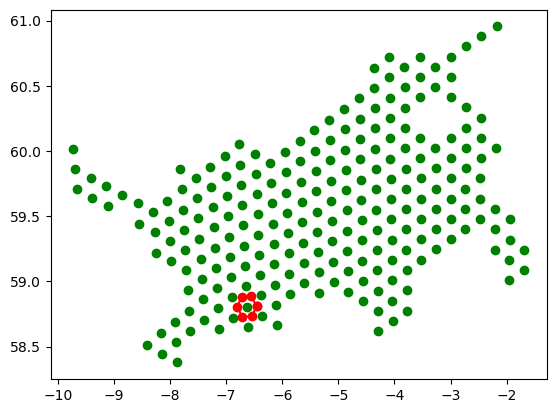

In [103]:
plot_conn_for_n(546)